In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

from sklearn.metrics import r2_score

from sklearn.model_selection import GridSearchCV



In [6]:
df = pd.read_csv("final_df.csv")
df.head()

,Brand,Model,Body Type,Drivetrain,Interior Colour,Exterior Colour,Fuel Type,Transmission Type,Doors,Cylinder Count,Distance (km),Mileage (kms/Lt),Years Used,Price
0,-1.787758,0.060456,0.221961,-0.23419,1.705456,-1.271302,-0.305554,-0.471911,0.388273,0.782905,-0.247961,-0.573538,-0.116881,0.000766
1,-1.787758,0.060456,0.221961,-0.23419,-0.763845,0.231667,-0.305554,-0.471911,-0.983069,0.782905,0.121655,-0.616377,0.139008,-0.154847
2,-1.787758,0.060456,0.221961,-0.23419,-0.763845,1.233647,2.886143,-0.471911,0.388273,-0.718409,-0.555321,-0.187983,-0.116881,-0.062203
3,-1.787758,0.060456,0.221961,-0.23419,-0.763845,1.233647,-0.305554,2.307237,0.388273,-0.718409,-0.284040,-0.187983,-0.372769,0.015898
4,-1.787758,0.060456,0.221961,-0.23419,1.705456,-0.770312,-0.305554,2.307237,0.388273,-0.718409,-0.019237,-0.359341,-0.628657,0.066198


In [7]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]
# (x,y)
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state=0)

# Model Training, Testing & Evaluation.

## 1. Linear Models:

### 1.1 Simple Linear Regression:

In [13]:
slr = linear_model.LinearRegression()
slr.fit(X_train, y_train)
slr.predict(X_train)

array([-0.64867469, -0.54674556,  0.66711337, ..., -0.28621389,
       -0.19143463, -0.28593072])

In [17]:
# R-squared
r_squared = slr.score(X_train, y_train)

# Manual calculation of Adjusted R-squared
n = x.shape[0]  # number of observations
p = x.shape[1]  # number of predictors (features)

adjusted_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - p - 1)

print(f"R-squared: {round((r_squared),2)}")
print(f"Adjusted R-squared: {round((adjusted_r_squared),2)}")

R-squared: 0.44
Adjusted R-squared: 0.44


### 1.2 Ridge Regression:

In [18]:
rr = linear_model.Ridge(alpha=.5)
rr.fit(X_train, y_train)
rr.predict(X_train)

array([-0.64865285, -0.54674513,  0.66709372, ..., -0.28619845,
       -0.19142303, -0.28591918])

In [19]:
# R-squared
r_squared = rr.score(X_train, y_train)

# Manual calculation of Adjusted R-squared
n = x.shape[0]  # number of observations
p = x.shape[1]  # number of predictors (features)

adjusted_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - p - 1)

print(f"R-squared: {round((r_squared),2)}")
print(f"Adjusted R-squared: {round((adjusted_r_squared),2)}")

R-squared: 0.44
Adjusted R-squared: 0.44


### 1.3 Lasso Regression:

In [20]:
lsr = linear_model.Lasso(alpha=0.1)
lsr.fit(X_train, y_train)
lsr.predict(X_train)

array([-0.65213792, -0.3740227 ,  0.56617911, ..., -0.20236856,
       -0.13511618, -0.16227517])

In [21]:
# R-squared
r_squared = lsr.score(X_train, y_train)

# Manual calculation of Adjusted R-squared
n = x.shape[0]  # number of observations
p = x.shape[1]  # number of predictors (features)

adjusted_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - p - 1)

print(f"R-squared: {round((r_squared),2)}")
print(f"Adjusted R-squared: {round((adjusted_r_squared),2)}")

R-squared: 0.39
Adjusted R-squared: 0.39


## 2. Tree Based Models:

### 2.1 Decision Tree Regressor:

In [24]:
dtree = DecisionTreeRegressor()
# Define the hyperparameters to tune and their values
param_grid = {
    'max_depth': [2, 4, 6, 8],
    'min_samples_split': [2, 4, 6, 8],
    'min_samples_leaf': [1, 2, 3, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

In [28]:
# Create a GridSearchCV object
grid_search = GridSearchCV(dtree, param_grid, cv=5, scoring='neg_mean_squared_error')
# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

s:\Anaconda3\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
320 fits failed out of a total of 960.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
320 fits failed with the following error:
Traceback (most recent call last):
  File "s:\Anaconda3\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "s:\Anaconda3\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "s:\Anaconda3\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "s:\A

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [2, 4, 6, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 4, 6, 8]},
             scoring='neg_mean_squared_error')

In [29]:
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)
print("Best model: ", grid_search.best_estimator_)


Best parameters found:  {'max_depth': 8, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 4}
Best cross-validation score:  -0.2696435354237698
Best model:  DecisionTreeRegressor(max_depth=8, max_features='log2', min_samples_leaf=4,
                      min_samples_split=4)


In [39]:
dtree = DecisionTreeRegressor(max_depth = 8, max_features = 'log2' , min_samples_leaf = 4, min_samples_split = 4)
dtree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8, max_features='log2', min_samples_leaf=4,
                      min_samples_split=4)

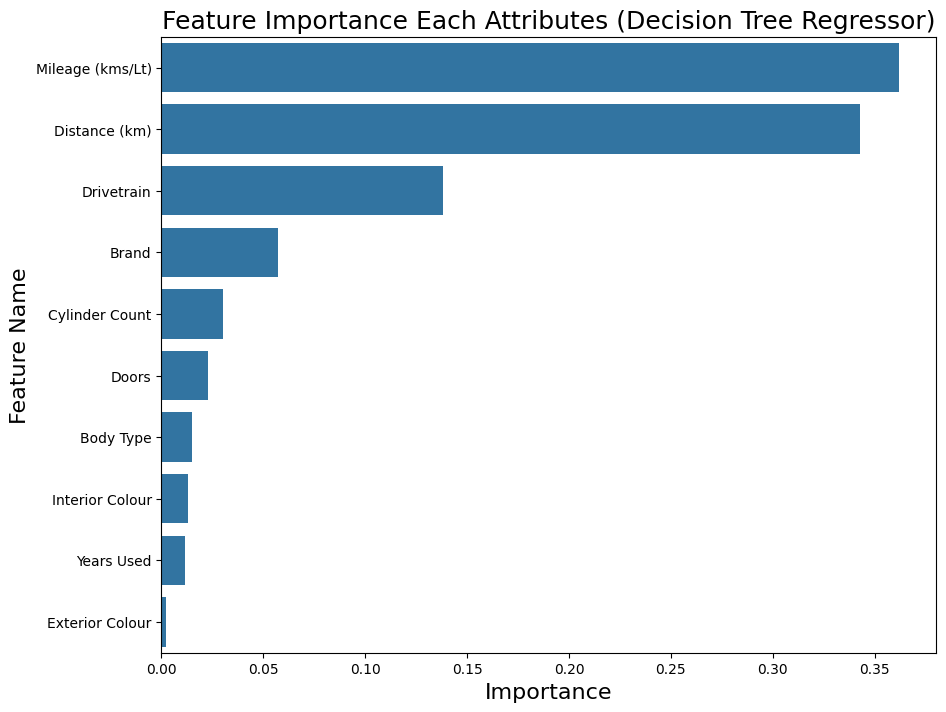

In [40]:
imp_df = pd.DataFrame({
    "Feature Name": x.columns,
    "Importance": dtree.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Feature Importance Each Attributes (Decision Tree Regressor)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

In [42]:
# import shap
# explainer = shap.Explainer(dtree, x)
# shap_values = explainer(x)
# shap.plots.waterfall(shap_values[0])

In [43]:
# R-squared
r_squared = dtree.score(X_train, y_train)

# Manual calculation of Adjusted R-squared
n = x.shape[0]  # number of observations
p = x.shape[1]  # number of predictors (features)

adjusted_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - p - 1)

print(f"R-squared: {round((r_squared),2)}")
print(f"Adjusted R-squared: {round((adjusted_r_squared),2)}")

R-squared: 0.84
Adjusted R-squared: 0.84


### Ensemble Models:

### 2.2 Bagging Model: Random Forest Regressor

In [46]:
# Create a Random Forest Regressor object
rf = RandomForestRegressor()

# Define the hyperparameter grid
param_grid = {
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

In [47]:
# Create a GridSearchCV object
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='r2')
# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

s:\Anaconda3\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
180 fits failed out of a total of 360.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "s:\Anaconda3\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "s:\Anaconda3\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "s:\Anaconda3\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "s:\A

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [3, 5, 7, 9],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='r2')

In [48]:
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)
print("Best model: ", grid_search.best_estimator_)

Best parameters found:  {'max_depth': 9, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}
Best cross-validation score:  0.8428416162651207
Best model:  RandomForestRegressor(max_depth=9, max_features='sqrt')


In [49]:
rf = RandomForestRegressor(max_depth=9, min_samples_split=2, min_samples_leaf=1, max_features='sqrt')
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=9, max_features='sqrt')

In [50]:
# R-squared
r_squared = rf.score(X_train, y_train)

# Manual calculation of Adjusted R-squared
n = x.shape[0]  # number of observations
p = x.shape[1]  # number of predictors (features)

adjusted_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - p - 1)

print(f"R-squared: {round((r_squared),2)}")
print(f"Adjusted R-squared: {round((adjusted_r_squared),2)}")

R-squared: 0.93
Adjusted R-squared: 0.93


### 2.3 Boosting Model: AdaBoost Regressor

In [52]:
# Define AdaBoostRegressor model
abr = AdaBoostRegressor()

# Define hyperparameters and possible values
params = {'n_estimators': [50, 100, 150],
          'learning_rate': [0.01, 0.1, 1, 10]}

In [53]:
# Perform GridSearchCV with 5-fold cross validation
grid_search = GridSearchCV(abr, param_grid=params, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=AdaBoostRegressor(),
             param_grid={'learning_rate': [0.01, 0.1, 1, 10],
                         'n_estimators': [50, 100, 150]},
             scoring='neg_mean_squared_error')

In [54]:
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)
print("Best model: ", grid_search.best_estimator_)

Best parameters found:  {'learning_rate': 0.1, 'n_estimators': 100}
Best cross-validation score:  -0.2992008675759531
Best model:  AdaBoostRegressor(learning_rate=0.1, n_estimators=100)


In [55]:
abr = AdaBoostRegressor(learning_rate=0.1, n_estimators=100)
abr.fit(X_train, y_train)

AdaBoostRegressor(learning_rate=0.1, n_estimators=100)

In [56]:
# R-squared
r_squared = abr.score(X_train, y_train)

# Manual calculation of Adjusted R-squared
n = x.shape[0]  # number of observations
p = x.shape[1]  # number of predictors (features)

adjusted_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - p - 1)

print(f"R-squared: {round((r_squared),2)}")
print(f"Adjusted R-squared: {round((adjusted_r_squared),2)}")

R-squared: 0.76
Adjusted R-squared: 0.76


# Cross Verifying Model Evaluation using AutoML:

In [1]:
from pycaret.regression import *

In [8]:
model = setup(data=df,target='Price')

,Description,Value
0,Session id,1619
1,Target,Price
2,Target type,Regression
3,Original data shape,"(14502, 14)"
4,Transformed data shape,"(14502, 14)"
5,Transformed train set shape,"(10151, 14)"
6,Transformed test set shape,"(4351, 14)"
7,Numeric features,13
8,Preprocess,True
9,Imputation type,simple


In [11]:
best_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.1119,0.1179,0.3197,0.8912,0.1040,1.0732,2.0330
rf,Random Forest Regressor,0.1127,0.1182,0.3290,0.8874,0.1042,1.1887,2.4410
lightgbm,Light Gradient Boosting Machine,0.1233,0.1339,0.3450,0.8750,0.1117,1.6759,0.1960
gbr,Gradient Boosting Regressor,0.1581,0.1642,0.3922,0.8402,0.1329,1.6692,0.5810
dt,Decision Tree Regressor,0.1499,0.2174,0.4547,0.7703,0.1339,1.4320,0.0570
knn,K Neighbors Regressor,0.1810,0.2860,0.5199,0.7177,0.1585,1.8730,0.2150
br,Bayesian Ridge,0.3504,0.5677,0.7357,0.4498,0.2359,5.2194,0.0210
ridge,Ridge Regression,0.3509,0.5677,0.7358,0.4497,0.2362,5.2349,0.0420
lar,Least Angle Regression,0.3509,0.5677,0.7358,0.4497,0.2362,5.2355,0.0190
lr,Linear Regression,0.3509,0.5677,0.7358,0.4497,0.2362,5.2355,0.0240


In [13]:
print(best_model)

ExtraTreesRegressor(n_jobs=-1, random_state=1619)


In [14]:
reg_model = create_model(best_model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.1027,0.0690,0.2627,0.8698,0.1016,0.6836
1,0.1148,0.1221,0.3495,0.8801,0.1037,1.8063
2,0.1075,0.0808,0.2842,0.9278,0.0926,1.0775
3,0.1090,0.0508,0.2254,0.9612,0.0958,0.7078
4,0.1169,0.0836,0.2891,0.9330,0.1026,0.7414
5,0.1436,0.4470,0.6685,0.7551,0.1196,0.8915
6,0.1124,0.1390,0.3729,0.8532,0.1103,1.2995
7,0.0991,0.0565,0.2377,0.9174,0.1008,1.6161
8,0.1019,0.0508,0.2254,0.9097,0.1003,0.9608


In [18]:
best_params = reg_model.get_params()
print(best_params)

{'bootstrap': False, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': -1, 'oob_score': False, 'random_state': 1619, 'verbose': 0, 'warm_start': False}
